In [1]:
# Importing libraries 
# Importing essential libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations

In [2]:
# Read the csv file into a pandas dataframe
# Read the academic data CSV file into a pandas DataFrame
# This will load the student records containing their names, gender and subject marks
df = pd.read_csv("acdemic_data.csv")

In [3]:
# Display the first 5 rows of the DataFrame using head() method
# This gives us a quick overview of the data structure and content
print(df.head())

  Firstname Lastname Gender  SPOS DSBDA     WT  DA
0        LA      Roy      M  85.0    88   90.0  92
1        SA    Dixit      F  90.0    90   94.0  95
2        AB   Danial      M   NaN    na  100.0  80
3        DA   Kapoor      M  95.0    86  500.0  82
4        SA      Jha      F   NaN    84   98.0  84


In [4]:
# 1 --Define a list of common missing value formats that may appear in the dataset
# These formats include various ways missing values might be represented in the data
missing_value_formats = [
    "n.a.",  # Common abbreviation for "not available"
    "?",     # Question mark often used to indicate unknown values
    "NA",    # Standard "not available" abbreviation
    "n/a",   # Another common "not available" format
    "na",    # Lowercase version of NA
    "--"     # Double dash sometimes used to represent missing values
]
# Read the CSV file with custom NA value formats
# This ensures consistent handling of missing values across different formats
# The na_values parameter specifies additional strings to recognize as NA/NaN
df = pd.read_csv("acdemic_data.csv", na_values=missing_value_formats)

In [5]:
# Display the first 10 rows of the Gender column from the DataFrame
# This helps verify the data after handling missing values and shows the gender distribution
print(df['Gender'].head(10))

0    M
1    F
2    M
3    M
4    F
5    F
6    M
7    F
8    M
9    M
Name: Gender, dtype: object


In [6]:
# 1 -- Null values are marked True
# Check for null values in the Gender column and display first 10 results
# Returns True for null values and False for non-null values
print(df['Gender'].isnull().head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Gender, dtype: bool


In [7]:
# notnull() returns False for NaN values and True for non-NaN values
# This is the opposite of isnull() - it marks all valid values as True
# and all missing/NaN values as False
print(df['Gender'].notnull().head(10))

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Gender, dtype: bool


In [8]:
# notnull() is a pandas method that returns a boolean mask where:
# - True indicates non-null values (valid data)
# - False indicates null values (NaN, None, etc.)
# This is useful for filtering out rows with missing data
null_filter = df['Gender'].notnull()

In [9]:
# Filter and display only rows where Gender column has valid (non-null) values
# This uses the boolean mask created earlier to show only complete records
# The null_filter variable contains True for valid entries and False for null values
print(df[null_filter]) 

   Firstname Lastname Gender   SPOS  DSBDA     WT   DA
0         LA      Roy      M   85.0   88.0   90.0   92
1         SA    Dixit      F   90.0   90.0   94.0   95
2         AB   Danial      M    NaN    NaN  100.0   80
3         DA   Kapoor      M   95.0   86.0  500.0   82
4         SA      Jha      F    NaN   84.0   98.0   84
5         WS   Thakur      F   87.0    NaN   97.0   86
6         DY   Kapoor      M   81.0   80.0   96.0   89
7         JK   Khanna      F   40.0   88.0   95.0   87
8         RT  Pardesi      M   10.0   96.0   94.0   88
9         UV  Pardesi      M    9.0    NaN   93.0   96
10        MN    Desai      F  200.0   87.0    NaN  N.A
11        BC    Patel      F  300.0    NaN   88.0  300


In [10]:
# Check if there are any null values in the entire DataFrame
# df.isnull() creates a boolean mask of all null values
# .values converts the mask to a numpy array
# .any() returns True if any value in the array is True (indicating presence of null values)
print(df.isnull().values.any())

True


In [11]:
# Drop all rows that contain any null values (NaN, None, etc.)
# axis=0 specifies we're dropping rows (axis=1 would drop columns)
# inplace=True modifies the DataFrame directly instead of returning a copy
# This is a common data cleaning step to remove incomplete records
df.dropna(axis=0, inplace=True)


In [12]:
# Drop all rows that contain at least one null value (NaN, None, etc.)
# This is a data cleaning operation that removes incomplete records
# - axis=0 specifies we're dropping rows (not columns)
# - how='any' means drop if ANY column in the row has a null value
# - Returns a new DataFrame with only complete rows
new_df = df.dropna(axis = 0, how ='any')

In [13]:
# drop all rows with all null
new_df = df.dropna(axis = 0, how ='all')

In [14]:
# Drop all columns that contain at least one null value (NaN, None, etc.)
# - axis=1 specifies we're dropping columns (not rows)
# - how='any' means drop if ANY row in the column has a null value
# - Returns a new DataFrame with only columns that have no null values
# This is useful for removing columns with incomplete data
new_df = df.dropna(axis=1, how='any')


In [15]:
# Drop all columns that contain only null values (NaN, None, etc.)
# - axis=1 specifies we're dropping columns (not rows)
# - how='all' means drop if ALL values in the column are null
# - Returns a new DataFrame with only columns that have at least one non-null value
# This is useful for removing completely empty columns from the dataset
new_df = df.dropna(axis = 1, how ='all')

In [16]:
# Replacing Null values with a constant value (0 in this case)
# - fillna() is used to replace null values with a specified value
# - inplace=True modifies the DataFrame directly instead of returning a copy
# - This is useful when you want to replace missing values with a meaningful default value
# - Common use case: replacing missing numeric values with 0 or another meaningful constant
df['SPOS'].fillna(0, inplace=True)



/var/folders/2j/73zzfhw16y5c_5v2q9j0mxvr0000gn/T/ipykernel_18743/2424766147.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SPOS'].fillna(0, inplace=True)


In [17]:
# To check changes call 
# - head() method displays the first n rows of the DataFrame
# - n=10 specifies we want to see the first 10 rows
# - This helps verify that our null value replacements worked correctly
# - We can see the SPOS column values after filling nulls with 0
print(df['SPOS'].head(10))


0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


In [18]:
#Replacing Null with the value from the previous row or the next row 
#method = 'pad’ for taking values from the previous row 
# Replacing Null values with values from adjacent rows
# - method='pad' uses forward fill (ffill) to take values from previous rows
# - inplace=True modifies the DataFrame directly instead of returning a copy
# - This is useful when you want to fill missing values with the most recent valid value
# - Common use case: time series data where missing values can be reasonably filled with previous values

df['DSBDA'] = df['DSBDA'].ffill()
print(df['DSBDA'].head(10))



0    88.0
1    90.0
3    86.0
6    80.0
7    88.0
8    96.0
Name: DSBDA, dtype: float64


In [19]:
# Using backward fill (bfill) to replace null values with values from subsequent rows
# - method='bfill' uses backward fill to take values from next rows
# - This is useful when forward fill isn't appropriate and you want to use future values
# - Common use case: when missing values should be filled with the next available value
df['SPOS'] = df['SPOS'].bfill()
print(df['SPOS'].head(10))


0    85.0
1    90.0
3    95.0
6    81.0
7    40.0
8    10.0
Name: SPOS, dtype: float64


In [20]:
# Display the first 5 rows of the DataFrame by default
# - head() method shows the first n rows (default n=5)
# - Useful for quick inspection of data structure and content
# - Shows column names and data types
# - Helps verify data cleaning operations
df.head()

,Firstname,Lastname,Gender,SPOS,DSBDA,WT,DA
0,LA,Roy,M,85.0,88.0,90.0,92
1,SA,Dixit,F,90.0,90.0,94.0,95
3,DA,Kapoor,M,95.0,86.0,500.0,82
6,DY,Kapoor,M,81.0,80.0,96.0,89
7,JK,Khanna,F,40.0,88.0,95.0,87


In [21]:
# Get the dimensions of the DataFrame
# - Returns a tuple containing (rows, columns)
# - First number represents total number of rows
# - Second number represents total number of columns
# - Useful for understanding the size and structure of the dataset
df.shape

(6, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x14b3ba780>,
 'caps': [<matplotlib.lines.Line2D at 0x14b3badb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b3ba5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14b3bb3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14b3bb680>],
 'means': []}

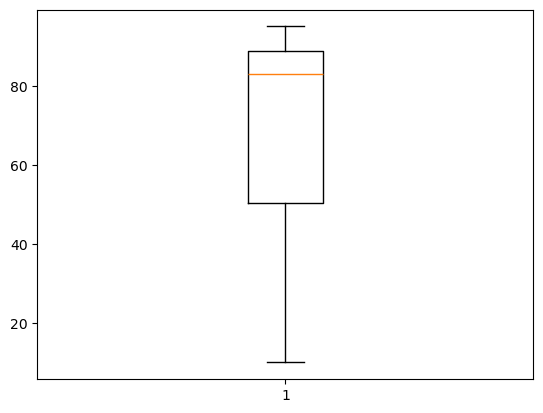

In [22]:
# Create a box plot to visualize the distribution of SPOS scores
# - x parameter specifies the data to plot (SPOS column from DataFrame)
# - Box plot shows:
#   * Median (middle line)
#   * First and third quartiles (box)
#   * Whiskers (extend to min/max excluding outliers)
#   * Individual points represent outliers
# - Useful for identifying:
#   * Data distribution
#   * Potential outliers
#   * Data spread and skewness
plt.boxplot(x=df['SPOS'])

In [25]:
# 3---Define numeric columns for normalization
# In this section, we performed data normalization using MinMax scaling on our academic dataset.
# The process involved:
# 1. Identifying numeric columns (SPOS, DSBDA, WT, DA) containing continuous academic scores
# 2. Using MinMaxScaler to transform these values to a range between 0 and 1
# 3. Creating new columns with '_minmax' suffix to store the normalized values
# 4. Preserving the original data while adding the transformed values
# This normalization helps in:
# - Comparing different subjects' scores on the same scale
# - Making the data more suitable for machine learning algorithms
# - Reducing the impact of different score ranges across subjects
# SPOS: System Programming and Operating System scores
# DSBDA: Data Science and Big Data Analytics scores
# WT: Web Technology scores
# DA: Data Analytics scores
# We'll use these columns for MinMax scaling to bring all values between 0 and 1
numeric_columns = ['SPOS', 'DSBDA', 'WT', 'DA']  # These are your numeric columns from the academic data

# Initialize MinMaxScaler to normalize data between 0 and 1
# - MinMaxScaler transforms features by scaling each feature to a given range
# - Default range is [0,1] which is suitable for our academic scores
# - This helps in comparing different subjects' scores on the same scale
# - Preserves the shape of the original distribution
# - Formula: X_std = (X - X.min) / (X.max - X.min)
# - X_scaled = X_std * (max - min) + min
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_transformed = df.copy()  # Create a copy of original dataframe
scaled_data = scaler.fit_transform(df[numeric_columns])

# Create new column names for transformed data
transformed_columns = [col + '_minmax' for col in numeric_columns]

# Add transformed data to dataframe
df_transformed[transformed_columns] = scaled_data

# Print to verify the transformation
print(df_transformed)

  Firstname Lastname Gender  SPOS  DSBDA     WT  DA  SPOS_minmax  \
0        LA      Roy      M  85.0   88.0   90.0  92     0.882353   
1        SA    Dixit      F  90.0   90.0   94.0  95     0.941176   
3        DA   Kapoor      M  95.0   86.0  500.0  82     1.000000   
6        DY   Kapoor      M  81.0   80.0   96.0  89     0.835294   
7        JK   Khanna      F  40.0   88.0   95.0  87     0.352941   
8        RT  Pardesi      M  10.0   96.0   94.0  88     0.000000   

   DSBDA_minmax  WT_minmax  DA_minmax  
0         0.500   0.000000   0.769231  
1         0.625   0.009756   1.000000  
3         0.375   1.000000   0.000000  
6         0.000   0.014634   0.538462  
7         0.500   0.012195   0.384615  
8         1.000   0.009756   0.461538  


In [ ]:
# 3--Data Type Analysis and Log Transformation
# In this section, we performed two important data preprocessing steps:
# 1. Data Type Verification:
#    - We first checked the data types of our numeric columns (SPOS, DSBDA, WT, DA)
#    - This helps ensure our data is in the correct format for further processing
# 2. Log Transformation:
#    - We converted all columns to numeric type using pd.to_numeric()
#    - Applied log1p transformation (log(1+x)) to handle:
#      * Zero values in the data
#      * Reduce skewness in the distribution
#      * Make the data more normally distributed
#      * Handle outliers by compressing the scale
#    - Created new columns with '_log' suffix for transformed values
# This process helps in:
# - Normalizing the data distribution
# - Making the data more suitable for statistical analysis
# - Reducing the impact of extreme values
# - Improving the performance of certain machine learning algorithms
print("Data types of columns:")
print(df[numeric_columns].dtypes)

# Convert columns to numeric type and handle log transformation
for col in numeric_columns:
    # Convert to numeric, coerce errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Apply log transformation only to positive values
    # Using log1p (log(1+x)) to handle zero values
    df_transformed[f'{col}_log'] = np.log1p(df[col])

# Print to verify transformation
print("\nTransformed Data:")
print(df_transformed.head())

Data types of columns:
SPOS     float64
DSBDA    float64
WT       float64
DA        object
dtype: object

Transformed Data:
  Firstname Lastname Gender  SPOS  DSBDA     WT  DA  SPOS_minmax  \
0        LA      Roy      M  85.0   88.0   90.0  92     0.882353   
1        SA    Dixit      F  90.0   90.0   94.0  95     0.941176   
3        DA   Kapoor      M  95.0   86.0  500.0  82     1.000000   
6        DY   Kapoor      M  81.0   80.0   96.0  89     0.835294   
7        JK   Khanna      F  40.0   88.0   95.0  87     0.352941   

   DSBDA_minmax  WT_minmax  DA_minmax  SPOS_log  DSBDA_log    WT_log    DA_log  
0         0.500   0.000000   0.769231  4.454347   4.488636  4.510860  4.532599  
1         0.625   0.009756   1.000000  4.510860   4.510860  4.553877  4.564348  
3         0.375   1.000000   0.000000  4.564348   4.465908  6.216606  4.418841  
6         0.000   0.014634   0.538462  4.406719   4.394449  4.574711  4.499810  
7         0.500   0.012195   0.384615  3.713572   4.488636  4.